# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd

training_file = "/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/data/train.p"
testing_file = "/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
sign_names = pd.read_csv('signnames.csv')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)


# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_test).nonzero()[0].size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

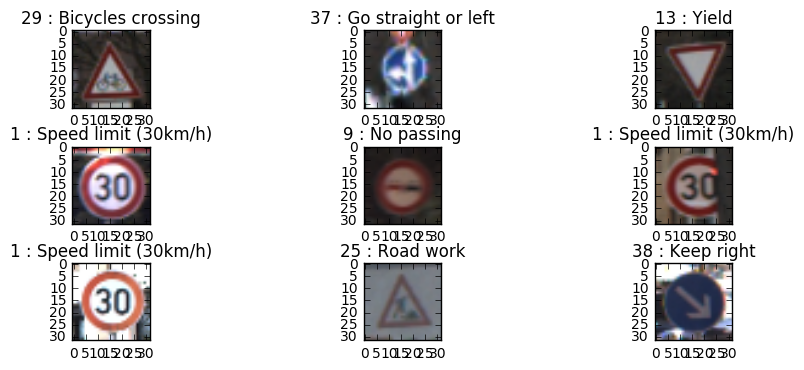

In [3]:
### Data exploration visualization goes here. 
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# display grid of random images (color) & their corresponding labels+names
sign_labels = np.genfromtxt('signnames.csv', delimiter=',',skip_header=1, usecols=(1,), unpack=True, dtype=None)

def plot_images(images, rows, columns, labels=[], labels_dict={}, random=True):
    figure = plt.figure()
    figure.subplots_adjust(right=1.5, hspace=0.5)
    n_images = len(images)
    max_plots = rows * columns
    end_range = n_images + 1 if n_images < max_plots else max_plots + 1
    for i in range(1,end_range):
        idx = np.random.choice(n_images, size=1, replace=False)[0] if random == True else i-1
        image = images[idx]
        subplot = figure.add_subplot(rows,columns,i)
        if len(labels) == n_images:
            id = labels[idx]      
            label = "{0} : {1}".format(id, labels_dict[id].decode())
        else:
            label = ""
        subplot.set_title(label)
        plt.imshow(image)
    plt.show()
    

plot_images(X_train, 3, 3, y_train, sign_labels)

Label: 10 - No passing for vehicles over 3.5 metric tons


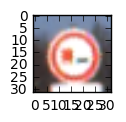

In [4]:
# display 1 random image (grayscale)
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray") 
label = "Label: {0} - {1}".format(y_train[index], sign_labels[y_train[index]].decode())
print(label)

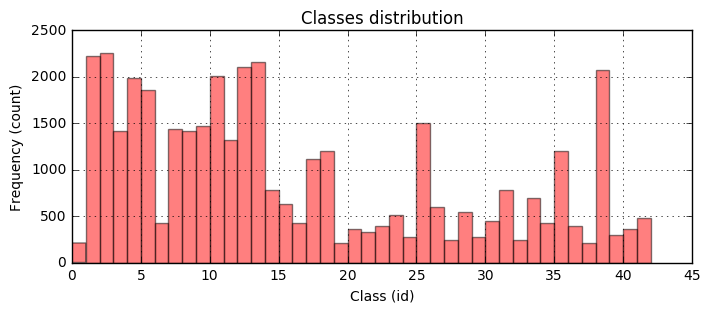

In [5]:
# display the classes distribution
def display_class_hist(labels, labels_count):
    plt.figure(figsize=(8, 3))
    plt.xlabel("Class (id)")
    plt.ylabel("Frequency (count)")
    plt.title("Classes distribution")
    plt.hist(labels, labels_count-1, facecolor='red', alpha=0.5)
    plt.grid(True)
    plt.show()

display_class_hist(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
def to_gray(img_array):
    new_array = []
    for i in range(len(img_array)):
        new_array.append(cv2.cvtColor(img_array[i], cv2.COLOR_RGB2GRAY))
    new_array = np.array(new_array).reshape((-1,32,32,1))
    #new_array = normalize_grayscale(new_array)
    return new_array

sign_labels = np.genfromtxt('signnames.csv', delimiter=',',skip_header=1, usecols=(1,), unpack=True, dtype=None)
    
X_train = to_gray(X_train)
X_test = to_gray(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I have preprocessed the data by simply converting to grayscale the color images. From what I have tested it seems that it works better on single channel images. All I had to do next was to expand the array to 4 dimensions to cope with tensor flow's format. I have experimented with data normalization but I didn't see much improvement.

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here. 

# Split data 80/20 for training/validation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I have split the training data as follows: 80% remains as training data, whereas 20% is used as validation. This is done easily using existing libraries ("sklearn"). The test data is unchanged.

In [8]:
### Define your architecture here.
import tensorflow as tf

# LeNet architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.softmax(conv1) # softmax
    conv1 = tf.nn.relu(conv1) 

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.softmax(conv2) # softmax
    conv2 = tf.nn.relu(conv2) 

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I decided to use the LeNet-5 as base architecture. I have added softmax before relu to improve the output (this was a suggestion from what I have read on the forums and online).
I have also experimented with dropout (I have added it after the activations in the first 2 layers) but it didn't work as expected when restoring the saved model. Therefore I've decided to simply remove it. 

In [9]:
### Train your model here.
EPOCHS = 15
BATCH_SIZE = 256

# features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# training pipeline
rate = 0.001

#logits = LeNet(x)
logits, conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
# model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

saver = tf.train.Saver([conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b])

# save placeholders & operations
tf.add_to_collection('x', x)
tf.add_to_collection('y', y) 
tf.add_to_collection('logits', logits)
tf.add_to_collection('correct_prediction', correct_prediction)
tf.add_to_collection('accuracy_operation', accuracy_operation)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# measure optimization time
import time

# train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    start = time.time()

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        c = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y}) 
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ".format(i+1), "cost: ", "{:.9f}".format(c), " accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    
    end = time.time()
    hours, rem = divmod(end - start, 3600)
    minutes, seconds = divmod(rem, 60)

    # measure training time
    print("\n")
    print("Optimization finished in:")
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
    print("\n")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    # save the resulting model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet22')
    print("Model saved")

Training...

EPOCH 1  cost:  1.900735855  accuracy = 0.447

EPOCH 2  cost:  0.613989890  accuracy = 0.794

EPOCH 3  cost:  0.354379386  accuracy = 0.880

EPOCH 4  cost:  0.261856407  accuracy = 0.909

EPOCH 5  cost:  0.193432629  accuracy = 0.921

EPOCH 6  cost:  0.203041032  accuracy = 0.938

EPOCH 7  cost:  0.275414079  accuracy = 0.941

EPOCH 8  cost:  0.102115430  accuracy = 0.951

EPOCH 9  cost:  0.080849648  accuracy = 0.953

EPOCH 10  cost:  0.071100175  accuracy = 0.959

EPOCH 11  cost:  0.037564605  accuracy = 0.961

EPOCH 12  cost:  0.102622345  accuracy = 0.963

EPOCH 13  cost:  0.019915393  accuracy = 0.964

EPOCH 14  cost:  0.071345672  accuracy = 0.964

EPOCH 15  cost:  0.017625464  accuracy = 0.967



Optimization finished in:
00:05:02.83


Test Accuracy = 0.920
Model saved


In [12]:
# evaluate the model
with tf.Session() as sess: 
    saver.restore(sess, '/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/lenet22')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.920


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I have used AdamOptimizer (similar to Stochastic gradient descent optimizer). The best results for my configuration were obtained using 30 epochs and a batch size of 256. I have reduced epochs size to 15 for quick tests to reduce training time. I have used a fixed learning rate of 0.001 but from what I have read new research indicates that variable learning rate (decreasing it over epochs) might work better in some cases. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I decided to use LeNet-5 due to the simplicity and it's popularity. Having a basic working example from the previous classes also helped :) . By adding an extra softmax in the activation in the first 2 layers increased the overall accuracy. This architecture is suitable because it already is configured for small resolution images. Minor modifications allowed me to obtain a working version pretty fast.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import cv2
import os

# load the other data ("newdata2" folder)
def load_label_names(filename):
    d = {}
    with open(filename) as f:
        csv_reader = csv.reader(f)
        pairs = [(int(r[0]),r[1]) for r in csv_reader if r[0]!='ClassId']
        d = dict(pairs)
    return d

def load_and_scale_images(folder): 
    image_names = os.listdir(folder) 
    bgr_images = [cv2.imread(folder + "/" + name) for name in image_names]
    rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in bgr_images]
    resized_images = [cv2.resize(img, (32, 32)) for img in rgb_images] 
    return resized_images

def grayscale(image):
  converted = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return np.expand_dims(converted, axis=4)

def process_images(images): 
  processed = [grayscale(image) for image in images] 
  return np.asarray(processed)

def display_new_images_and_labels(images, labels):
    plt.figure(figsize=(15, 15))
    i = 1
    for image in images:
        plt.subplot(8, 8, i)
        plt.axis('off') 
        label_text = labels[i - 1]
        if label_text != -1:
            plt.title("{0:.30}".format(label_names_dict[labels[i - 1]]))
        else:
            plt.title("Not in training set")
        plt.imshow(image)
        i += 1

    plt.show()
    return

Loaded: 22 images and labels.



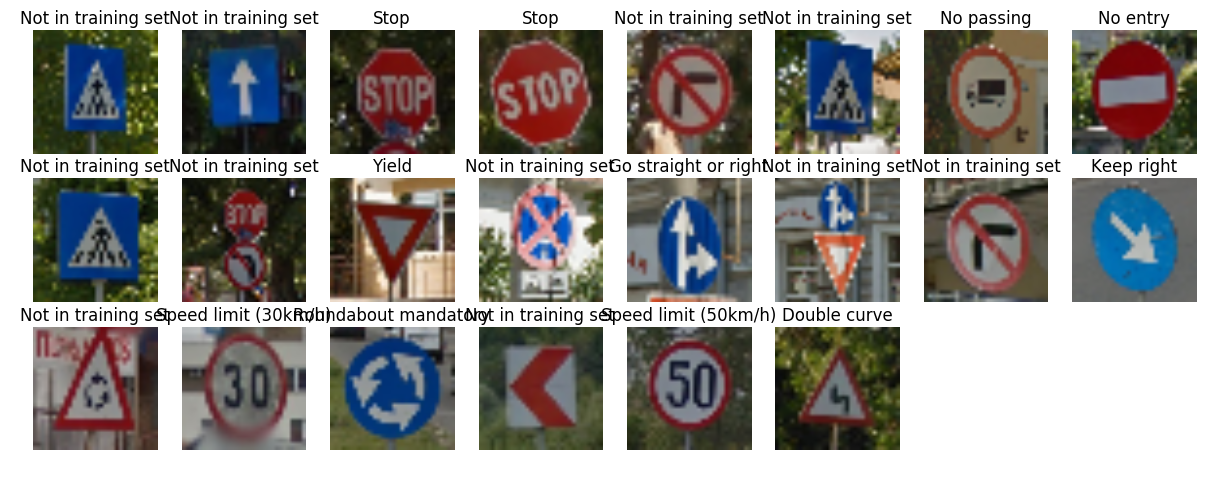

In [29]:
label_names_dict = load_label_names('signnames.csv')
images = load_and_scale_images("newdata2")

# label: -1 means not in training set
images_labels = np.array([-1, -1, 14, 14, -1, -1, 9, 17, 
                           -1, -1, 13, -1, 36, -1, -1, 38, 
                           -1, 1, 40, -1, 2, 21])

n_images = process_images(images)

print("Loaded: {0} images and labels.".format(len(images)))
print()

display_new_images_and_labels(images, images_labels)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [30]:
### Run the predictions here.

# test "newdata" that was loaded
tf.reset_default_graph()

with tf.Session() as sess:
    # Restore the model
    saver = tf.train.import_meta_graph("lenet22" + '.meta') 
    saver.restore(sess, '/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/lenet22')
    print("Restored: model")

    # Restore the placeholder
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    print("Restored: placeholders")

    # Restore the operations
    logits = tf.get_collection('logits')[0]
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    print("Restored: operations")

    all_vars = tf.trainable_variables()
    print("Restored: {0} variables".format(len(all_vars)))

    # Run the model
    predictions = sess.run(logits, feed_dict={x: n_images})
    labels = np.argmax(predictions, axis=1)

    accuracy = sess.run(accuracy_operation, feed_dict={x: n_images, y: images_labels})
    print()
    print("Accuracy on new data = {:.3f}".format(accuracy))
    print()

Restored: model
Restored: placeholders
Restored: operations
Restored: 10 variables

Accuracy on new data = 0.364



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Not really, but it might also be caused by the fact that I chose traffic signs that are not present in the existing dataset. Therefore the accuracy is reduced, but there are still errors with signs that exist in the training set, errors caused by having additional signs in the image (ex: sample 10 and 14). Errors in classification can be caused also by different scene illuminaton and sign orientation. This could be further improved by data augmentation: generating new images by processing the existing ones.

In [32]:
### Visualize the softmax probabilities here.

probabilities = tf.placeholder(tf.float32, (None, 43))

with tf.Session() as sess:
    top_k_probs = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities), k=5), feed_dict={probabilities: predictions}) 

top_k_probabilities = top_k_probs[0]
top_k_predictions = top_k_probs[1]

print()
print("Top K probabilities: ")
print(top_k_probabilities[:5])
print()
print("Top K predictions: ")
print(top_k_predictions[:5])


Top K probabilities: 
[[  6.57860637e-01   1.83457181e-01   1.33273140e-01   1.52186183e-02
    7.18554668e-03]
 [  7.25162506e-01   2.55500972e-01   7.96457194e-03   6.08850317e-03
    3.41925491e-03]
 [  9.95401859e-01   2.29611504e-03   1.63100299e-03   6.13781973e-04
    2.45026004e-05]
 [  9.97493625e-01   2.21912493e-03   1.93702130e-04   4.49080144e-05
    1.71144366e-05]
 [  9.96922195e-01   2.58041057e-03   4.42115153e-04   2.68530403e-05
    7.50507706e-06]]

Top K predictions: 
[[26 24 28 18 29]
 [20 35 10  9 36]
 [14  1  0 33  4]
 [14 33 29 28 13]
 [ 4 39 33 24  1]]


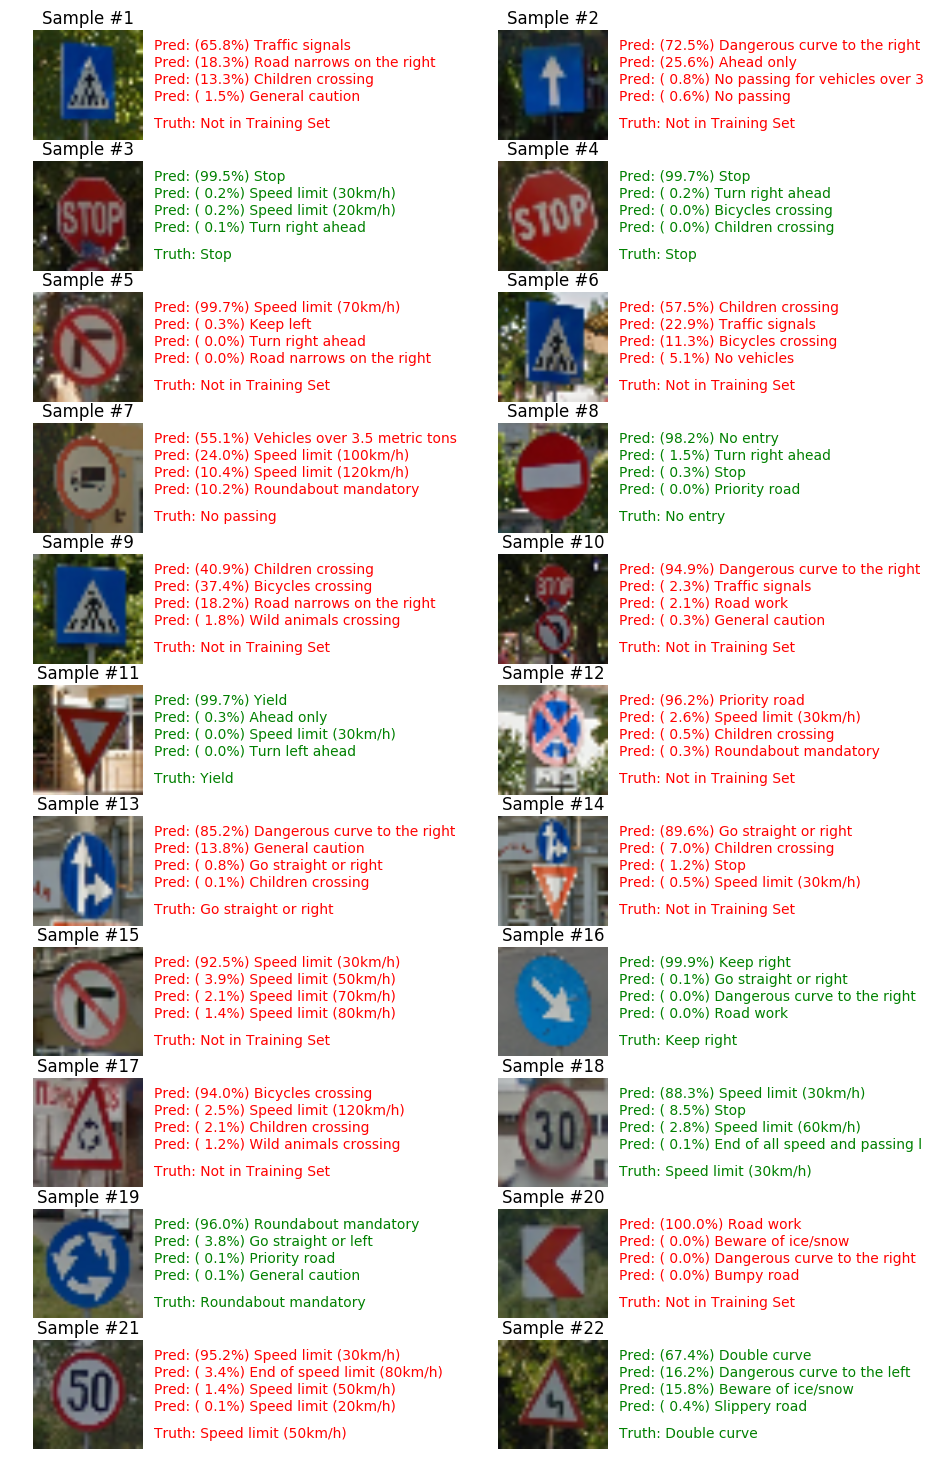

In [28]:
# display "newdata" that was evaluated
fig = plt.figure(figsize=(11, 20))
for i in range(len(predictions)):
    truth = images_labels[i]
    prediction = labels[i]
    plt.subplot(12, 2, 1+i)
    plt.title("Sample #{0}".format(i+1))
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'

    # Plot the top 4 probabilities on the side of the image
    for j in range(4):
        pred_label = label_names_dict[top_k_predictions[i][j]]
        pred_certainty = top_k_probabilities[i][j]
        plt.text(35, 5*(j+1), "Pred: ({0:4.1f}%) {1:.30}".format(100*pred_certainty, pred_label), color=color)

    # Plot the truth label or 'Not in Training Set' if not present.
    if truth != -1:
        plt.text(35, 28, "Truth: {0:.30}".format(label_names_dict[truth]), color=color)
    else:
        plt.text(35, 28, "Truth: {0}".format('Not in Training Set'), color=color)

    plt.imshow(images[i])
    
#plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.